In [1]:
import pandas as pd
import numpy as np

from utils.dataprep import load_emb_gz, make_categories, load_emb

In [2]:
# embedding_file = "data/imagenet-27x80-vgg19.test-ctg.emb.gz"
embedding_file = "data/big/mcrae-459x100-vgg19.emb.gz"

# embedding_file = "data/esp-10000-vgg19.emb.gz"
# embedding_file = "data/imagenet-200x65-vgg19.train.emb.gz"
# results_file = "models/200807-190731-basic.res.csv"
# results_file = "models/200807-190731-basic-noctg.res.csv"
# results_file = "models/200807-190731-basic-esp.res.csv"
# results_file = "models/200807-200959-basic4-noctg.res.csv"
# results_file = "models/200808-135631-switch4-esp.res.csv"

# results_file = "test_outputs/000-200822-190027-swi-4-gib-50-47.res.csv"
results_file = "test_outputs/200914-143953-swi-4-non-50-20.res.csv"
# results_file = "test_outputs/200827-104336-noexplore.res.csv"
# New architecture, gibbs sampling
# results_file = "test_outputs/000-200824-063024-swi-4-gib-100-40.res.csv"
# New architecture, no exploring
# results_file = "test_outputs/000-200824-045043-swi-4-FAL-100-40.res.csv"

### Load categories

In [3]:
_, labels, _ = load_emb_gz(embedding_file)
categories = make_categories(labels)
categories

DONE. 46988 items loaded from data/big/mcrae-459x100-vgg19.emb.gz.
459 categories found.


array([  1,   1,   1, ..., 177, 177, 177], dtype=int64)

In [99]:
# load broad categories
fname = "data/synid_concepts_custom.csv"
# print(df)
df = pd.read_csv(fname)
wnids = pd.Series([x.split("\\")[-2].split(".")[0] for x in labels])
df = pd.DataFrame({"wn_id": wnids}).merge(df, on="wn_id")
# broad_categories = df[df["wn_id"].isin(wnidset)]["broad_concept"].values
broad_categories = pd.Categorical(df[df["wn_id"].isin(wnidset)]["broad_concept"]).codes
broad_categories

array([0, 0, 0, ..., 5, 5, 5], dtype=int8)

### Load results

In [100]:
results = pd.read_csv(results_file, index_col=0)
df = results[["target_image", "active_images", "chosen_symbol", "chosen_image_index", "success"]]

In [101]:
results

,sender_name,receiver_name,active_images,target_image,chosen_symbol,chosen_symbol_p,chosen_image,chosen_image_p,chosen_image_index,success
0,01.sender,02.receiver,4871:10918:8230:5479,4871,48,0.777965,4871,0.431502,0,1
1,01.sender,02.receiver,3195:12805:8796:8773,3195,48,0.989013,3195,0.690935,2,1
2,01.sender,02.receiver,11409:6281:1407:4153,11409,48,0.473849,1407,0.403780,3,0
3,01.sender,02.receiver,7117:9841:919:12328,7117,21,0.292213,919,0.716868,1,0
4,01.sender,02.receiver,860:12163:3037:9267,860,48,0.223399,9267,0.329085,3,0
...,...,...,...,...,...,...,...,...,...,...
4995,01.sender,02.receiver,4983:8401:5197:12797,4983,48,0.868819,4983,0.783659,3,1
4996,01.sender,02.receiver,10381:7272:6895:6058,10381,13,0.705294,10381,0.469497,1,1
4997,01.sender,02.receiver,11148:116:8514:1121,11148,48,0.915914,11148,0.717217,2,1
4998,01.sender,02.receiver,8243:7454:934:8154,8243,13,0.773021,8243,0.422411,0,1


In [102]:
df.loc[:, "category"] = df.apply(lambda x: categories[x.loc["target_image"]], axis=1)
df.loc[:, "broad_category"] = df.apply(lambda x: broad_categories[x.loc["category"]], axis=1)
df.loc[:, "chosen_symbol"] = df.loc[:, "chosen_symbol"].apply(lambda x: int(x.strip("[]")))
df.loc[:, "chosen_image_index"] = df.loc[:, "chosen_image_index"].apply(lambda x: int(x.strip("[]")))

D:\ProgramData\Anaconda3\envs\jupyter-mess\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\ProgramData\Anaconda3\envs\jupyter-mess\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


AttributeError: 'int' object has no attribute 'strip'

In [103]:
df

,target_image,active_images,chosen_symbol,chosen_image_index,success,category,broad_category
0,4871,4871:10918:8230:5479,48,0,1,414,2
1,3195,3195:12805:8796:8773,48,2,1,98,0
2,11409,11409:6281:1407:4153,48,3,0,320,14
3,7117,7117:9841:919:12328,21,1,0,298,17
4,860,860:12163:3037:9267,48,3,0,233,17
...,...,...,...,...,...,...,...
4995,4983,4983:8401:5197:12797,48,3,1,100,0
4996,10381,10381:7272:6895:6058,13,1,1,314,14
4997,11148,11148:116:8514:1121,48,2,1,384,14
4998,8243,8243:7454:934:8154,13,0,1,11,0


There shouldn't be any correlation between *chosen_symbol* and *image_index*:

In [35]:
pd.pivot_table(df, values="target_image", index=["chosen_symbol"], columns=["chosen_image_index"], aggfunc=np.size)

chosen_image_index,0,1,2,3
chosen_symbol,,,,
4,201,222,222,207
13,162,148,160,138
21,182,162,200,182
36,100,113,105,111
37,207,224,226,201
40,184,208,182,200
48,194,188,181,190


In [36]:
pd.pivot_table(df, values="target_image", index=["chosen_symbol"], columns=["success"], aggfunc=np.size)

success,0,1
chosen_symbol,,
4,268,584
13,303,305
21,187,539
36,59,370
37,325,533
40,260,514
48,244,509


## tSNE

In [12]:
from sklearn.manifold import TSNE

In [97]:
data = np.zeros([len(categories), (df.loc[:, "chosen_symbol"].max() + 1)])
for k, row in df.iterrows():
    target = row["target_image"]
    other = row["active_images"].split(":")
    for img in other:
        img = int(img)
        if img == target:
            data[img, row["chosen_symbol"]] += 1
        else:
            data[img, row["chosen_symbol"]] -= 0.05
# data = data / data.sum(axis=1)[:, np.newaxis]
notnan = np.where(~np.isnan(data).any(axis=1))
data = data[notnan, :][0]

In [77]:
len(categories)

5000

In [107]:
tsne = TSNE(n_components=2)
reduced = tsne.fit_transform(data)

In [16]:
import matplotlib.pyplot as plt

## Scatterplot with image categories

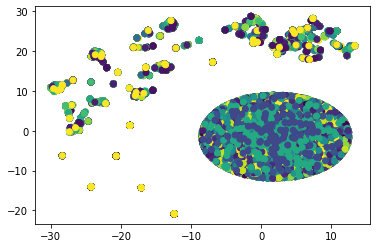

In [108]:
# plt.scatter(*reduced.T, c=categories[notnan])
plt.scatter(*reduced.T, c=broad_categories[notnan])

Symbol usage obviously doesn't correlate with imagenet categories. This is in accord with the fact that ignoring the categories in training doesn't affect the training process at all.

## Control plot with used symbols

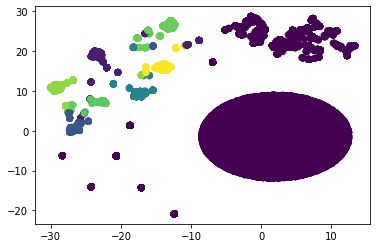

In [109]:
plt.scatter(*reduced.T, c=data.argmax(axis=1))

This is just to make sure that the tSNE works. It does.

In [110]:
plt.scatter(*reduced.T, c=df.loc[notnan, "success"])

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 5000,  5001,  5002,  5003,  5004,\n            ...\n            46983, 46984, 46985, 46986, 46987],\n           dtype='int64', length=41988). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

## UMAP

In [39]:
from umap import UMAP

In [40]:
coords_2 = UMAP(n_components=2, n_neighbors=10).fit_transform(data)

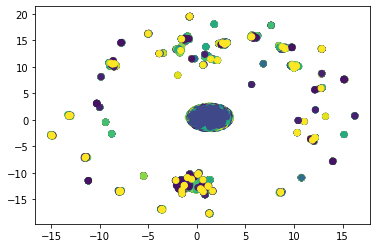

In [104]:
plt.scatter(*coords_2.T, c=broad_categories[notnan])

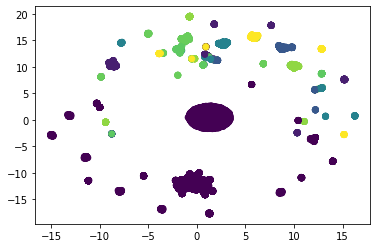

In [105]:
plt.scatter(*coords_2.T, c=data.argmax(axis=1))

In [106]:
plt.scatter(*coords_2.T, c=df.loc[notnan, "success"])

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([ 5000,  5001,  5002,  5003,  5004,\n            ...\n            46983, 46984, 46985, 46986, 46987],\n           dtype='int64', length=41988). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"